<a href="https://colab.research.google.com/github/romeroc223/SySistemas2025/blob/main/Taller2_Ejercicios_2_10_a_2_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 2.10

#  Ejercicio: Transformada Inversa de Laplace

---

## 1.  Transformada Inversa para $X_1(s) = \frac{2}{(s+1)^3}$

La función de transferencia (del ejercicio anterior) es:
$$X_1(s) = \frac{2}{(s+1)^3} \quad \text{con ROC}: \Re\{s\} > -1$$

### Aplicación de la Tabla:
Buscamos una forma que se ajuste a la propiedad de $\mathcal{L}^{-1}$ de una potencia de $s$ desplazada. La transformada de Laplace inversa de una potencia es:
$$\mathcal{L}^{-1}\left\{\frac{n!}{(s-a)^{n+1}}\right\} = t^n e^{at}u(t)$$

Reescribimos $X_1(s)$:
$$X_1(s) = \frac{2}{(s - (-1))^{3}}$$

Comparando con la fórmula:
* Exponente: $n+1 = 3 \quad \Rightarrow \quad n = 2$
* Polo: $a = -1$
* Numerador requerido: $n! = 2! = 2$

Dado que el numerador de $X_1(s)$ es precisamente $2 = 2!$, la aplicación es directa.

$$\mathcal{L}^{-1}\left\{\frac{2!}{(s+1)^{2+1}}\right\} = t^2 e^{-1t}u(t)$$

### Resultado Final:
$$\boxed{x_1(t) = t^2e^{-t}u(t)}$$

---

## 2.  Transformada Inversa para $X_2(s) = \frac{1}{(s+1)(s+2)^2}$

La función de transferencia es:
$$X_2(s) = \frac{1}{(s+1)(s+2)^2} \quad \text{con ROC}: \Re\{s\} > -1$$

### a) Descomposición en Fracciones Parciales:
El polo en $s=-2$ es repetido (orden 2), por lo que la descomposición tiene la forma:
$$X_2(s) = \frac{A}{s+1} + \frac{B}{s+2} + \frac{C}{(s+2)^2}$$

Multiplicamos por el denominador común $(s+1)(s+2)^2$:
$$1 = A(s+2)^2 + B(s+1)(s+2) + C(s+1)$$

**Cálculo de las constantes:**

1.  **Para $s = -1$ (Polo simple):**
    $$1 = A(-1+2)^2 + 0 + 0 \quad \Rightarrow \quad \mathbf{A = 1}$$

2.  **Para $s = -2$ (Polo repetido - término de mayor orden):**
    $$1 = 0 + 0 + C(-2+1) \quad \Rightarrow \quad 1 = -C \quad \Rightarrow \quad \mathbf{C = -1}$$

3.  **Para $s = 0$ (o cualquier otro valor para encontrar $B$):**
    Sustituimos $A=1$, $C=-1$:
    $$1 = A(0+2)^2 + B(0+1)(0+2) + C(0+1)$$
    $$1 = 1(4) + B(2) + (-1)(1)$$
    $$1 = 4 + 2B - 1 \quad \Rightarrow \quad 1 = 3 + 2B$$
    $$2B = 1 - 3 = -2 \quad \Rightarrow \quad \mathbf{B = -1}$$

**Sustituyendo los valores en $X_2(s)$:**
$$X_2(s) = \frac{1}{s+1} - \frac{1}{s+2} - \frac{1}{(s+2)^2}$$

### b) Transformada Inversa Término a Término:
Utilizamos las siguientes transformadas base (asumiendo ROC $\Re\{s\} > -1$, por lo tanto causal, $u(t)$):

* **Término 1 ($A$):** $\mathcal{L}^{-1}\left\{\frac{1}{s+1}\right\} = e^{-t}u(t)$

* **Término 2 ($B$):** $\mathcal{L}^{-1}\left\{\frac{1}{s+2}\right\} = e^{-2t}u(t)$

* **Término 3 ($C$):** $\mathcal{L}^{-1}\left\{\frac{1}{(s+2)^2}\right\}$. Utilizamos la propiedad $\mathcal{L}^{-1}\left\{\frac{1}{(s-a)^2}\right\} = t e^{at}u(t)$:
    $$\mathcal{L}^{-1}\left\{\frac{1}{(s - (-2))^2}\right\} = t e^{-2t}u(t)$$

### c) Resultado Final:
Sumando los términos inversos:
$$x_2(t) = e^{-t}u(t) - e^{-2t}u(t) - t e^{-2t}u(t)$$

Factorizando el escalón unitario $u(t)$:
$$\boxed{x_2(t) = \left[e^{-t} - e^{-2t} - t e^{-2t}\right]u(t)}$$

In [ ]:
import sympy as sp

# Definir símbolos
s, t = sp.symbols('s t', real=False)
# Transformada inversa de Laplace
X = 1/((s+1)*(s+2)**2)
x_inv = sp.inverse_laplace_transform(X, s, t)
print("Transformada inversa con SymPy:")
sp.pprint(x_inv.simplify())

# 4. ROC y Causalidad

---

## 4.1. Análisis de la Causalidad para $X_2(s) = \frac{1}{(s+1)(s+2)^2}$

La Transformada de Laplace $X_2(s)$ tiene los siguientes polos:
* Polo simple en $p_1 = -1$.
* Polo doble en $p_2 = -2$.

La Región de Convergencia (ROC) dada es $\Re\{s\} \ge -1$ (o más comúnmente $\Re\{s\} > -1$ para que la transformada converja estrictamente).

**Principio de Causalidad:** Para que una señal $x(t)$ sea **causal** ($x(t)=0$ para $t<0$), su ROC debe ser la región a la derecha del polo con la parte real más grande (el "polo más a la derecha").

**Verificación:**
* El polo más a la derecha es $p_1 = -1$.
* La ROC es $\Re\{s\} > -1$.

Dado que la ROC está a la **derecha** de todos los polos ($\Re\{s\} > \Re\{p\}_{\text{máx}}$), el sistema y la señal temporal $x_2(t)$ son **causales**.

---



In [ ]:
# Código para verificar ambos
import sympy as sp
s, t = sp.symbols('s t')

# Primera función
X1 = 2/(s+1)**3
x1 = sp.inverse_laplace_transform(X1, s, t)
print("X1 inversa:", x1)

# Segunda función
X2 = 1/((s+1)*(s+2)**2)
x2 = sp.inverse_laplace_transform(X2, s, t)
print("X2 inversa:", x2.simplify())

#Punto 2.11

# Ejercicio: Análisis de Sistema SLIT mediante EDO



## 1. Relación entre $\lambda$ y la Salida Obtenida (Caso $n=2$)

Para una EDO de segundo orden con entrada $x(t) = e^{st}$, la solución particular (respuesta forzada) es:

$$y_p(t) = \frac{e^{st}}{a_0 + a_1 s + a_2 s^2}$$

En el análisis de la **ecuación homogénea** asociada, las soluciones naturales son de la forma $y_h(t) = e^{\lambda t}$, donde $\lambda$ debe satisfacer la **ecuación característica**:
$$a_2 \lambda^2 + a_1 \lambda + a_0 = 0$$

### Relación Clave:
* **$s$** es la frecuencia compleja de la **señal de entrada** ($x(t) = e^{st}$).
* **$\lambda$** son las **raíces características** de la EDO homogénea.

La **Función de Transferencia** $H(s)$ se define como el factor de escalamiento de la entrada $e^{st}$ para obtener la salida $y_p(t)$:
$$H(s) = \frac{1}{a_0 + a_1 s + a_2 s^2}$$

Los **polos** de $H(s)$ son los valores de $s$ que anulan el denominador, y estos valores son precisamente las raíces $\lambda$ de la ecuación característica.

$$\text{Polos de } H(s) = \lambda \quad \text{tal que} \quad a_0 + a_1 \lambda + a_2 \lambda^2 = 0$$



## 2. Generalización a EDO de Orden Arbitrario $n$

### EDO General de Orden $n$:
$$\sum_{k=0}^{n} a_k \frac{d^k y(t)}{dt^k} = x(t), \quad a_n \neq 0$$

### Para Entrada $x(t) = e^{st}$:
Proponemos la solución particular $y_p(t) = H(s)e^{st}$ y sustituimos en la EDO.
$$\sum_{k=0}^{n} a_k \frac{d^k}{dt^k}[H(s)e^{st}] = e^{st}$$

La $k$-ésima derivada de $H(s)e^{st}$ es $H(s)s^k e^{st}$.
$$H(s)e^{st} \sum_{k=0}^{n} a_k s^k = e^{st}$$

### Función de Transferencia General $H(s)$:
Despejando $H(s)$:
$$H(s) = \frac{1}{\displaystyle\sum_{k=0}^{n} a_k s^k} = \frac{1}{a_n s^n + a_{n-1} s^{n-1} + \cdots + a_1 s + a_0}$$

### Polos del Sistema (Valores $\lambda$):
Los polos $\lambda_i$ de $H(s)$ son las $n$ raíces de la **ecuación característica**:
$$\sum_{k=0}^{n} a_k \lambda^k = 0$$

Por lo tanto, $H(s)$ puede ser escrita en función de sus polos $\lambda_i$:
$$H(s) = \frac{1}{a_n(s - \lambda_1)(s - \lambda_2) \cdots (s - \lambda_n)}$$



## 3.Interpretación Completa de la Solución

La solución general de la EDO se compone de la respuesta natural (homogénea) y la respuesta forzada (particular):

$$y(t) = \underbrace{\sum_{i=1}^{n} C_i e^{\lambda_i t}}_{\text{Respuesta Natural (Transitoria)}} + \underbrace{H(s)e^{st}}_{\text{Respuesta Forzada (Estacionaria)}}$$

* $\lambda_i$: **Modos naturales** del sistema (polos).
* $C_i$: Constantes determinadas por las **condiciones iniciales**.

### Casos Especiales:

1.  **Condiciones Iniciales Cero (Respuesta de estado cero):**
    $$C_i = 0 \quad \forall i \quad \Rightarrow \quad y(t) = H(s)e^{st}$$

2.  **Resonancia (Entrada con modo natural):**
    Si la frecuencia de entrada coincide con un polo, $s = \lambda_i$, entonces $H(s) \to \infty$.
    En este caso, la solución particular debe modificarse a $y_p(t) = t e^{\lambda_i t}$ (o una forma similar), resultando en una salida inestable o creciente.



## 4. Resumen y Conclusiones

| Concepto | Ecuación / Definición | Relación con $\lambda_i$ |
| :--- | :--- | :--- |
| **Función de Transferencia $H(s)$** | $H(s) = \frac{Y(s)}{X(s)}$ | $\lambda_i$ son las raíces del denominador de $H(s)$ (polos). |
| **Ecuación Característica** | $\sum_{k=0}^{n} a_k \lambda^k = 0$ | Sus raíces son los $\lambda_i$. |
| **Estabilidad** | Comportamiento asintótico. | El sistema es **estable** si $\Re\{\lambda_i\} < 0 \ \forall i$. |
| **Modos Naturales** | $e^{\lambda_i t}$ | Determinan la respuesta libre (sin entrada) del sistema. |



#Punto 2.12

# Ejercicio 2.12: Función de Transferencia de Circuitos RLC



## 1. Circuito RLC Serie

La salida $v_C(t)$ se toma sobre el capacitor, y la entrada es la tensión de alimentación $v_i(t)$.

### Ecuación Diferencial (EDO):
Aplicando la **Segunda Ley de Kirchhoff (Ley de Tensiones)**:
$$v_i(t) = v_R(t) + v_L(t) + v_C(t)$$

Usando las relaciones constitutivas ($v_R=Ri$, $v_L=L\frac{di}{dt}$, $i=C\frac{dv_C}{dt}$), expresamos la EDO en términos de $v_C(t)$:
$$v_i(t) = R \left(C \frac{dv_C(t)}{dt}\right) + L \frac{d}{dt} \left(C \frac{dv_C(t)}{dt}\right) + v_C(t)$$
$$LC \frac{d^2 v_C(t)}{dt^2} + RC \frac{dv_C(t)}{dt} + v_C(t) = v_i(t)$$


### Función de Transferencia $H_1(s)$:
Aplicando la **Transformada de Laplace** a la EDO bajo condiciones iniciales cero (C.I.=0):
$$\mathcal{L}\{LC \ddot{v}_C + RC \dot{v}_C + v_C\} = \mathcal{L}\{v_i\}$$
$$LC s^2 V_C(s) + RC s V_C(s) + V_C(s) = V_i(s)$$
$$V_C(s) (LC s^2 + RC s + 1) = V_i(s)$$

$$ \boxed{H_1(s) = \frac{V_C(s)}{V_i(s)} = \frac{1}{LC s^2 + RC s + 1}} $$

### Parámetros Estándar:
Comparando con la forma $\frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$, normalizando $H_1(s)$ dividiendo por $LC$:
$$H_1(s) = \frac{1/LC}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

* **Frecuencia Natural no Amortiguada ($\omega_n$):** $\omega_n = \frac{1}{\sqrt{LC}}$
* **Factor de Amortiguamiento ($\zeta$):** $2\zeta\omega_n = \frac{R}{L} \Rightarrow \zeta = \frac{R}{2L\omega_n} = \frac{R}{2L}\sqrt{LC} = \frac{R}{2}\sqrt{\frac{C}{L}}$



## 2. Circuito RLC Paralelo

La salida $i_L(t)$ se toma en el inductor, y la entrada es la corriente de alimentación $i_i(t)$.

### Ecuación Diferencial (EDO):
Aplicando la **Primera Ley de Kirchhoff (Ley de Corrientes)** en el nodo:
$$i_i(t) = i_R(t) + i_C(t) + i_L(t)$$

Usando las relaciones constitutivas ($i_R=v/R$, $i_C=C\frac{dv}{dt}$, $v=L\frac{di_L}{dt}$), expresamos la EDO en términos de $i_L(t)$:
$$i_i(t) = \frac{1}{R} \left(L \frac{di_L(t)}{dt}\right) + C \frac{d}{dt} \left(L \frac{di_L(t)}{dt}\right) + i_L(t)$$
$$LC \frac{d^2 i_L(t)}{dt^2} + \frac{L}{R} \frac{di_L(t)}{dt} + i_L(t) = i_i(t)$$


### Función de Transferencia $H_2(s)$:
Aplicando la **Transformada de Laplace** a la EDO bajo condiciones iniciales cero (C.I.=0):
$$\mathcal{L}\{LC \ddot{i}_L + \frac{L}{R} \dot{i}_L + i_L\} = \mathcal{L}\{i_i\}$$
$$LC s^2 I_L(s) + \frac{L}{R} s I_L(s) + I_L(s) = I_i(s)$$
$$I_L(s) \left(LC s^2 + \frac{L}{R} s + 1\right) = I_i(s)$$

$$ \boxed{H_2(s) = \frac{I_L(s)}{I_i(s)} = \frac{1}{LC s^2 + \frac{L}{R} s + 1}} $$

### Parámetros Estándar:
Normalizando $H_2(s)$ dividiendo por $LC$:
$$H_2(s) = \frac{1/LC}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}$$

* **Frecuencia Natural no Amortiguada ($\omega_n$):** $\omega_n = \frac{1}{\sqrt{LC}}$
* **Factor de Amortiguamiento ($\zeta$):** $2\zeta\omega_n = \frac{1}{RC} \Rightarrow \zeta = \frac{1}{2RC\omega_n} = \frac{1}{2RC}\sqrt{LC} = \frac{1}{2R}\sqrt{\frac{L}{C}}$



## 3. Tabla Comparativa y Propiedades

| Parámetro | RLC Serie ($v_i \to v_C$) | RLC Paralelo ($i_i \to i_L$) |
| :--- | :--- | :--- |
| **EDO** | $LC\ddot{v}_C + RC\dot{v}_C + v_C = v_i$ | $LC\ddot{i}_L + \frac{L}{R}\dot{i}_L + i_L = i_i$ |
| **$H(s)$** | $\frac{1}{LC s^2 + RC s + 1}$ | $\frac{1}{LC s^2 + \frac{L}{R} s + 1}$ |
| **Frecuencia Natural ($\omega_n$)** | $\frac{1}{\sqrt{LC}}$ | $\frac{1}{\sqrt{LC}}$ |
| **Factor Amortiguamiento ($\zeta$)** | $\frac{R}{2}\sqrt{\frac{C}{L}}$ | $\frac{1}{2R}\sqrt{\frac{L}{C}}$ |

**Dualidad entre circuitos:**

Observe la dualidad al comparar el término $\frac{R}{L}$ (RLC Serie, término $s$) con $\frac{1}{RC}$ (RLC Paralelo, término $s$) en los denominadores normalizados:
$$s^2 + \left(\frac{R}{L}\right)s + \frac{1}{LC} \quad \text{vs} \quad s^2 + \left(\frac{1}{RC}\right)s + \frac{1}{LC}$$
La **Frecuencia Natural $\omega_n$** es idéntica en ambos casos, $\frac{1}{\sqrt{LC}}$.

**Análisis de Estabilidad y Causalidad:**

Ambos sistemas son de segundo orden con **polos conjugados** que provienen de la solución de la ecuación característica. Dado que los coeficientes $L, C, R$ son positivos (elementos pasivos):
* El factor de amortiguamiento $\zeta$ siempre será positivo.
* Esto implica que la parte real de los polos ($\Re\{s\}$) es siempre **negativa**.
* Los sistemas son **estables**.
* Dado que la Función de Transferencia se obtuvo de la EDO, y el impulso de la EDO es causal, el sistema es **causal** y la $\mathrm{ROC}$ es la región a la derecha de los polos (todo el semiplano derecho $\Re\{s\} > \Re\{p\}_{\text{máx}}$).



## 4. Código para Simulación (Python/Colab)

El siguiente código utiliza la biblioteca `control` para calcular y graficar la respuesta en frecuencia (Diagrama de Bode) de ambos circuitos RLC, demostrando su comportamiento como **filtros pasabajos** de segundo orden.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 6.6 MB/s  0:00:00


/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


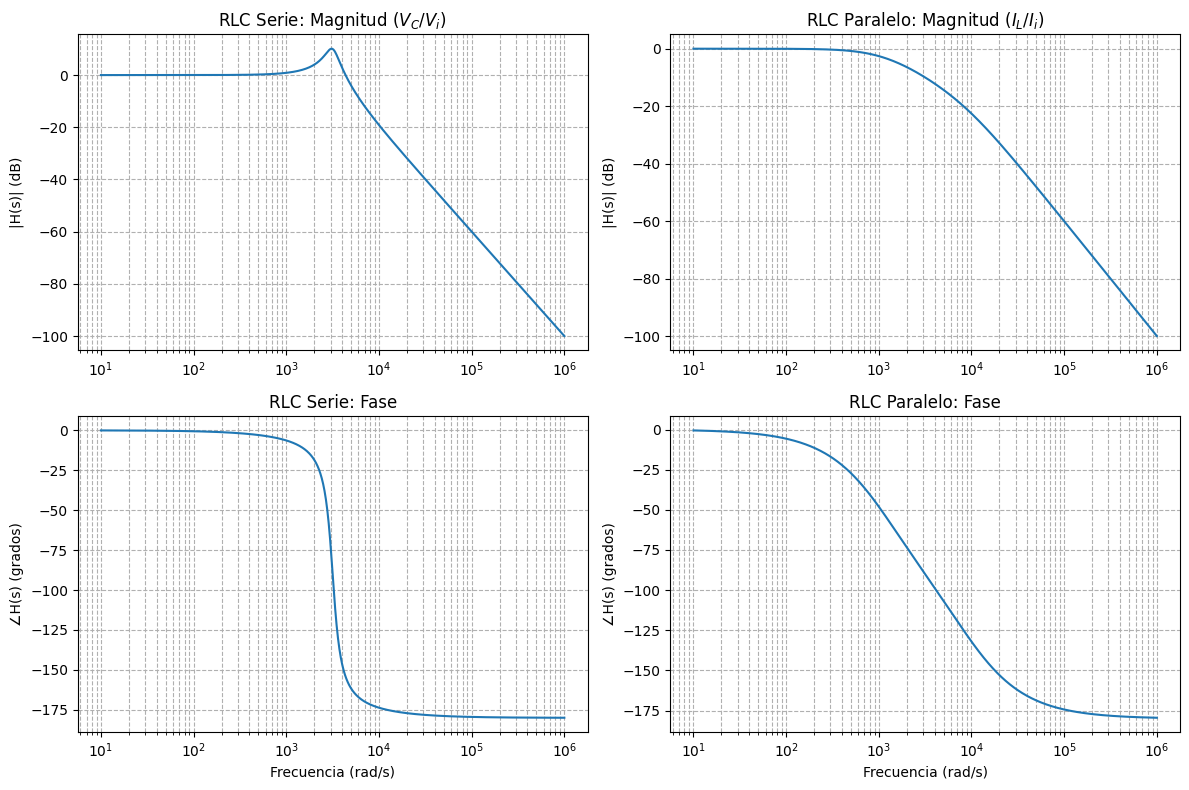

In [7]:
!pip install --upgrade pip
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Parámetros del circuito RLC (Subamortiguado: zeta < 1)
R = 100  # Ω
L = 0.1  # H
C = 1e-6  # F

# --- RLC Serie: H1(s) = Vc(s)/Vi(s) ---
num1 = [1]
den1 = [L*C, R*C, 1] # [LC, RC, 1]
H1 = ct.TransferFunction(num1, den1)

# Parámetros calculados para H1:
zeta1 = R/2 * np.sqrt(C/L)
# print(f"RLC Serie: Zeta = {zeta1:.2f}")

# --- RLC Paralelo: H2(s) = IL(s)/Ii(s) ---
num2 = [1]
den2 = [L*C, L/R, 1] # [LC, L/R, 1]
H2 = ct.TransferFunction(num2, den2)

# Parámetros calculados para H2:
zeta2 = 1/(2*R) * np.sqrt(L/C)
# print(f"RLC Paralelo: Zeta = {zeta2:.2f}")

# Respuesta en frecuencia (Bode)
omega = np.logspace(1, 6, 1000)
mag1, phase1, omega1 = ct.bode(H1, omega, plot=False)
mag2, phase2, omega2 = ct.bode(H2, omega, plot=False)

# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Magnitud RLC Serie
axes[0, 0].semilogx(omega1, 20*np.log10(mag1))
axes[0, 0].set_title('RLC Serie: Magnitud ($V_C/V_i$)')
axes[0, 0].set_ylabel('|H(s)| (dB)')

# Fase RLC Serie
axes[1, 0].semilogx(omega1, phase1*180/np.pi)
axes[1, 0].set_title('RLC Serie: Fase')
axes[1, 0].set_xlabel('Frecuencia (rad/s)')
axes[1, 0].set_ylabel('∠H(s) (grados)')

# Magnitud RLC Paralelo
axes[0, 1].semilogx(omega2, 20*np.log10(mag2))
axes[0, 1].set_title('RLC Paralelo: Magnitud ($I_L/I_i$)')
axes[0, 1].set_ylabel('|H(s)| (dB)')

# Fase RLC Paralelo
axes[1, 1].semilogx(omega2, phase2*180/np.pi)
axes[1, 1].set_title('RLC Paralelo: Fase')
axes[1, 1].set_xlabel('Frecuencia (rad/s)')
axes[1, 1].set_ylabel('∠H(s) (grados)')

for ax_row in axes:
    for ax in ax_row:
        ax.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

#Punto 2.13

# Ejercicio 2.13: Respuesta en Lazo Cerrado de Circuitos RLC



## 1. Configuración en Lazo Cerrado

Para ambos circuitos, se asume un esquema de **realimentación unitaria negativa**. La función de transferencia de lazo cerrado $G(s)$ se relaciona con la función de lazo abierto $H(s)$ mediante:

$$G(s) = \frac{Y(s)}{R(s)} = \frac{H(s)}{1 + H(s)}$$




## 2. Circuito RLC Serie en Lazo Cerrado

### 2.1 Función de Transferencia $G_1(s)$:

La función de transferencia en **lazo abierto** $H_1(s) = V_C(s)/V_i(s)$ fue:
$$H_1(s) = \frac{1}{LC s^2 + RC s + 1}$$

Sustituyendo en la fórmula de lazo cerrado:
$$G_1(s) = \frac{\frac{1}{LC s^2 + RC s + 1}}{1 + \frac{1}{LC s^2 + RC s + 1}} = \frac{1}{(LC s^2 + RC s + 1) + 1}$$

$$ \boxed{G_1(s) = \frac{1}{LC s^2 + RC s + 2}} $$

### 2.2 Parámetros Dinámicos (Forma Estándar):
Normalizando $G_1(s)$ dividiendo el numerador y denominador por $LC$:
$$G_1(s) = \frac{1/LC}{s^2 + \frac{R}{L}s + \frac{2}{LC}}$$

Comparando con $G(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$:
* **Frecuencia Natural ($\omega_n$):** $\omega_n^2 = \frac{2}{LC} \quad \Rightarrow \quad \omega_n = \sqrt{\frac{2}{LC}}$
* **Factor de Amortiguamiento ($\zeta$):** $2\zeta\omega_n = \frac{R}{L} \quad \Rightarrow \quad \zeta = \frac{R}{2L\omega_n} = \frac{R}{2L}\sqrt{\frac{LC}{2}} = \frac{R}{2}\sqrt{\frac{C}{2L}}$



## 3. Circuito RLC Paralelo en Lazo Cerrado

### 3.1 Función de Transferencia $G_2(s)$:

La función de transferencia en **lazo abierto** $H_2(s) = I_L(s)/I_i(s)$ fue:
$$H_2(s) = \frac{1}{LC s^2 + \frac{L}{R} s + 1}$$

Sustituyendo en la fórmula de lazo cerrado:
$$G_2(s) = \frac{1}{LC s^2 + \frac{L}{R} s + 2}$$

$$ \boxed{G_2(s) = \frac{1}{LC s^2 + \frac{L}{R} s + 2}} $$

### 3.2 Parámetros Dinámicos (Forma Estándar):
Normalizando $G_2(s)$ dividiendo por $LC$:
$$G_2(s) = \frac{1/LC}{s^2 + \frac{1}{RC}s + \frac{2}{LC}}$$

* **Frecuencia Natural ($\omega_n$):** $\omega_n = \sqrt{\frac{2}{LC}}$ (Idéntica al RLC Serie)
* **Factor de Amortiguamiento ($\zeta$):** $2\zeta\omega_n = \frac{1}{RC} \quad \Rightarrow \quad \zeta = \frac{1}{2RC\omega_n} = \frac{1}{2RC}\sqrt{\frac{LC}{2}} = \frac{1}{2R}\sqrt{\frac{L}{2C}}$



## 4. Respuestas Típicas y Parámetros

### 4.1 Fórmulas Generales (Sistema de Segundo Orden Subamortiguado, $\zeta < 1$):

En ambos casos, $G(s)$ tiene la forma $\frac{K'}{s^2 + 2\zeta\omega_n s + \omega_n^2}$ (donde $K' = \omega_n^2 = 2/LC$).

| Entrada $R(s)$ | Respuesta $Y(s) = G(s)R(s)$ | Respuesta Temporal $y(t)$ |
| :--- | :--- | :--- |
| **Impulso** ($R(s)=1$) | $\frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$ | $\boxed{y(t) = \frac{\omega_n}{\sqrt{1-\zeta^2}} e^{-\zeta\omega_n t} \sin(\omega_d t) u(t)}$ |
| **Escalón** ($R(s)=1/s$) | $\frac{\omega_n^2}{s(s^2 + 2\zeta\omega_n s + \omega_n^2)}$ | $\boxed{y(t) = \left[ 1 - \frac{e^{-\zeta\omega_n t}}{\sqrt{1-\zeta^2}} \sin\left(\omega_d t + \phi\right) \right] u(t)}$ |
| **Rampa** ($R(s)=1/s^2$) | $\frac{\omega_n^2}{s^2(s^2 + 2\zeta\omega_n s + \omega_n^2)}$ | $\boxed{e_{ss} = \lim_{t \to \infty} [t - y(t)] = \frac{2\zeta}{\omega_n} = \frac{\text{Coef. de } s \text{ en den.}}{ \text{Coef. indep. en den.}}}$ |

*Donde $\omega_d = \omega_n\sqrt{1-\zeta^2}$ y $\phi = \tan^{-1}\left(\frac{\sqrt{1-\zeta^2}}{\zeta}\right)$.*

### 4.2 Error en Estado Estacionario (Para Entrada Rampa):

El error en estado estacionario para una entrada rampa ($R(s) = 1/s^2$) en un sistema de tipo 0 (como este, que no tiene polos en $s=0$) es:

* **RLC Serie:** $\text{Coef. de } s / \text{Coef. independiente} = \frac{RC}{2}$
* **RLC Paralelo:** $\text{Coef. de } s / \text{Coef. independiente} = \frac{L/R}{2} = \frac{L}{2R}$

$$\boxed{e_{ss} \text{ (RLC Serie)} = \frac{RC}{2}} \quad \text{y} \quad \boxed{e_{ss} \text{ (RLC Paralelo)} = \frac{L}{2R}}$$



## 5. Análisis de Desempeño (Con Valores Típicos)

Usando los valores típicos del enunciado: $R = 100 \, \Omega, \quad L = 0.1 \, \text{H}, \quad C = 10 \, \mu\text{F} = 10^{-5} \, \text{F}$.

### 5.1 Parámetros Dinámicos Comunes:
$$LC = 0.1 \times 10^{-5} = 10^{-6}$$
$$\omega_n = \sqrt{\frac{2}{LC}} = \sqrt{2 \times 10^6} \approx \mathbf{1414.21 \, \text{rad/s}}$$

### 5.2 RLC Serie:
$$\zeta_1 = \frac{R}{2}\sqrt{\frac{C}{2L}} = \frac{100}{2}\sqrt{\frac{10^{-5}}{2 \times 0.1}} = 50\sqrt{0.5 \times 10^{-4}} \approx \mathbf{0.0354}$$
* $\zeta_1 \ll 1 \Rightarrow$ **Sistema altamente Subamortiguado.**
* **Sobreoscilación** $M_p = e^{-\zeta \pi / \sqrt{1-\zeta^2}} \approx \mathbf{90.3\%}$ (muy alta).

### 5.3 RLC Paralelo:
$$\zeta_2 = \frac{1}{2R}\sqrt{\frac{L}{2C}} = \frac{1}{200}\sqrt{\frac{0.1}{2 \times 10^{-5}}} = \frac{1}{200}\sqrt{5000} \approx \mathbf{0.354}$$
* $\zeta_2 < 1 \Rightarrow$ **Sistema Subamortiguado.**
* **Sobreoscilación** $M_p \approx \mathbf{30.7\%}$ (moderada).

### 5.4 Errores en Estado Estacionario (Rampa):
* $e_{ss}$ (RLC Serie): $RC/2 = (100 \times 10^{-5}) / 2 = \mathbf{0.0005}$
* $e_{ss}$ (RLC Paralelo): $L/(2R) = 0.1 / (2 \times 100) = \mathbf{0.0005}$

El error en estado estacionario es idéntico en ambos circuitos bajo estas condiciones.

In [ ]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal
import control as ct

# ============================================
# PARÁMETROS DEL CIRCUITO
# ============================================
R = 100      # Ω
L = 0.1      # H
C = 10e-6    # F (10 μF)

# ============================================
# 1. FUNCIONES DE TRANSFERENCIA
# ============================================

# Lazo abierto - RLC Serie
H1_num = [1]
H1_den = [L*C, R*C, 1]
H1 = ct.TransferFunction(H1_num, H1_den)

# Lazo abierto - RLC Paralelo
H2_num = [1]
H2_den = [L*C, L/R, 1]
H2 = ct.TransferFunction(H2_num, H2_den)

# Lazo cerrado - RLC Serie
G1_num = [1]
G1_den = [L*C, R*C, 2]
G1 = ct.TransferFunction(G1_num, G1_den)

# Lazo cerrado - RLC Paralelo
G2_num = [1]
G2_den = [L*C, L/R, 2]
G2 = ct.TransferFunction(G2_num, G2_den)

# ============================================
# 2. SIMULACIÓN TEMPORAL
# ============================================
t = np.linspace(0, 0.05, 5000)  # 50 ms

# Respuesta al impulso
t_impulse1, y_impulse1 = ct.impulse_response(G1, T=t)
t_impulse2, y_impulse2 = ct.impulse_response(G2, T=t)

# Respuesta al escalón
t_step1, y_step1 = ct.step_response(G1, T=t)
t_step2, y_step2 = ct.step_response(G2, T=t)

# Respuesta a la rampa
# Para rampa, usamos: Y(s) = G(s)/s^2
# Creamos sistema aumentado: G_rampa = G * 1/s
G1_rampa = ct.series(G1, ct.TransferFunction([1], [1, 0]))
G2_rampa = ct.series(G2, ct.TransferFunction([1], [1, 0]))

t_rampa1, y_rampa1 = ct.step_response(G1_rampa, T=t)
t_rampa2, y_rampa2 = ct.step_response(G2_rampa, T=t)

# La entrada rampa es t, así que calculamos el error
rampa_input = t
rampa_output1 = y_rampa1
rampa_output2 = y_rampa2

# ============================================
# 3. GRÁFICOS
# ============================================
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Impulso - RLC Serie
axes[0, 0].plot(t_impulse1, y_impulse1, 'b-', linewidth=2)
axes[0, 0].set_title('RLC Serie: Respuesta al Impulso')
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('$y(t)$')
axes[0, 0].grid(True)
axes[0, 0].set_xlim([0, 0.02])

# Impulso - RLC Paralelo
axes[0, 1].plot(t_impulse2, y_impulse2, 'r-', linewidth=2)
axes[0, 1].set_title('RLC Paralelo: Respuesta al Impulso')
axes[0, 1].set_xlabel('Tiempo (s)')
axes[0, 1].set_ylabel('$y(t)$')
axes[0, 1].grid(True)
axes[0, 1].set_xlim([0, 0.02])

# Escalón - RLC Serie
axes[1, 0].plot(t_step1, y_step1, 'b-', linewidth=2)
axes[1, 0].plot(t_step1, np.ones_like(t_step1), 'k--', alpha=0.5, label='Referencia')
axes[1, 0].set_title('RLC Serie: Respuesta al Escalón')
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('$y(t)$')
axes[1, 0].grid(True)
axes[1, 0].legend()
axes[1, 0].set_xlim([0, 0.02])

# Escalón - RLC Paralelo
axes[1, 1].plot(t_step2, y_step2, 'r-', linewidth=2)
axes[1, 1].plot(t_step2, np.ones_like(t_step2), 'k--', alpha=0.5, label='Referencia')
axes[1, 1].set_title('RLC Paralelo: Respuesta al Escalón')
axes[1, 1].set_xlabel('Tiempo (s)')
axes[1, 1].set_ylabel('$y(t)$')
axes[1, 1].grid(True)
axes[1, 1].legend()
axes[1, 1].set_xlim([0, 0.02])

# Rampa - RLC Serie
axes[2, 0].plot(t, rampa_input, 'k--', alpha=0.5, label='Entrada rampa $t$')
axes[2, 0].plot(t_rampa1, rampa_output1, 'b-', linewidth=2, label='Salida')
axes[2, 0].set_title('RLC Serie: Respuesta a la Rampa')
axes[2, 0].set_xlabel('Tiempo (s)')
axes[2, 0].set_ylabel('$y(t)$')
axes[2, 0].grid(True)
axes[2, 0].legend()
axes[2, 0].set_xlim([0, 0.05])

# Rampa - RLC Paralelo
axes[2, 1].plot(t, rampa_input, 'k--', alpha=0.5, label='Entrada rampa $t$')
axes[2, 1].plot(t_rampa2, rampa_output2, 'r-', linewidth=2, label='Salida')
axes[2, 1].set_title('RLC Paralelo: Respuesta a la Rampa')
axes[2, 1].set_xlabel('Tiempo (s)')
axes[2, 1].set_ylabel('$y(t)$')
axes[2, 1].grid(True)
axes[2, 1].legend()
axes[2, 1].set_xlim([0, 0.05])

plt.tight_layout()
plt.show()

# ============================================
# 4. CÁLCULO ANALÍTICO CON SYMPY
# ============================================
print("="*60)
print("CÁLCULO ANALÍTICO CON SYMPY")
print("="*60)

s, t_sym = sp.symbols('s t')
R_sym, L_sym, C_sym = sp.symbols('R L C')

# Función en lazo cerrado - RLC Serie
G1_sym = 1/(L_sym*C_sym*s**2 + R_sym*C_sym*s + 2)

# Para entrada impulso
Y1_impulse = G1_sym
y1_impulse = sp.inverse_laplace_transform(Y1_impulse, s, t_sym)
print("\nRLC Serie - Respuesta al impulso:")
sp.pprint(y1_impulse.simplify())

# Para entrada escalón
Y1_step = G1_sym/s
y1_step = sp.inverse_laplace_transform(Y1_step, s, t_sym)
print("\nRLC Serie - Respuesta al escalón:")
sp.pprint(y1_step.simplify())

# Para entrada rampa
Y1_rampa = G1_sym/s**2
y1_rampa = sp.inverse_laplace_transform(Y1_rampa, s, t_sym)
print("\nRLC Serie - Respuesta a la rampa:")
sp.pprint(y1_rampa.simplify())

# Sustituir valores numéricos
print("\n" + "="*60)
print("RESULTADOS NUMÉRICOS (con los valores dados)")
print("="*60)

valores = {R_sym: R, L_sym: L, C_sym: C}

y1_step_num = y1_step.subs(valores)
print("\nRLC Serie - Respuesta al escalón (numérica):")
print(sp.nsimplify(y1_step_num))

# Calcular sobreoscilación (para escalón)
omega_n = sp.sqrt(2/(L*C))
zeta = (R/2)*sp.sqrt(C/(2*L))
print(f"\nParámetros RLC Serie:")
print(f"  ω_n = {float(omega_n):.2f} rad/s")
print(f"  ζ = {float(zeta):.4f}")
print(f"  Sistema {'subamortiguado' if zeta < 1 else 'sobreamortiguado'}")

# Sobreoscilación porcentual
if zeta < 1:
    Mp = sp.exp(-sp.pi*zeta/sp.sqrt(1-zeta**2))
    print(f"  Sobreoscilación Mp = {float(Mp*100):.2f}%")

# Tiempo de establecimiento (2%)
ts_2 = 4/(zeta*omega_n)
print(f"  Tiempo de establecimiento (2%) = {float(ts_2*1000):.2f} ms")

#Punto 2.14

# Análisis de Sistemas de Segundo Orden (Circuitos RLC)



## 1. Definiciones Fundamentales

Un **Sistema Lineal e Invariante en el Tiempo (SLIT)** de segundo orden se describe por la función de transferencia (FT) canónica, asumiendo la forma genérica sin ceros:

$$\mathbf{G(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}}$$

Donde:
* **$\omega_n$**: **Frecuencia natural no amortiguada** (rad/s). Determina la velocidad de la respuesta oscilatoria.
* **$\zeta$**: **Factor de amortiguamiento** (adimensional). Determina la forma de la respuesta transitoria.

### Clasificación de la Respuesta Transitoria

La ubicación de los **polos** $s_{1,2} = -\zeta\omega_n \pm j\omega_n\sqrt{1-\zeta^2}$ está determinada por $\zeta$:

| Tipo de Amortiguamiento | Rango de $\zeta$ | Polos $s_{1,2}$ | Respuesta Temporal |
| :--- | :--- | :--- | :--- |
| **Subamortiguado** | $0 < \zeta < 1$ | Polos complejos conjugados | Oscilación decreciente (ideal para control) |
| **Amortiguamiento Crítico** | $\zeta = 1$ | Polos reales e iguales | Decaimiento más rápido sin sobreimpulso |
| **Sobreamortiguado** | $\zeta > 1$ | Polos reales y distintos | Decaimiento lento sin sobreimpulso |



## 2. Expresiones para Parámetros del Sistema en Circuitos RLC

Las expresiones a continuación se obtienen de normalizar la Función de Transferencia (FT) del circuito a la forma canónica $G(s)$, asumiendo condiciones iniciales cero (C.I.=0).

### A. Circuito RLC Serie

FT del voltaje en el capacitor, $V_C(s)$, respecto a la entrada de voltaje $V_{in}(s)$:
$$\mathbf{G_S(s) = \frac{V_C(s)}{V_{in}(s)} = \frac{\frac{1}{LC}}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

| Parámetro | Expresión en función de $R, L, C$ (Circuito Serie) |
| :--- | :--- |
| $\omega_n$ (Frecuencia natural no amortiguada) | $$\omega_n = \frac{1}{\sqrt{LC}}$$ |
| $\zeta$ (Factor de amortiguamiento) | $$\zeta = \frac{R}{2}\sqrt{\frac{C}{L}}$$ |
| $\omega_d$ (Frecuencia natural amortiguada) | $$\omega_d = \omega_n \sqrt{1-\zeta^2} = \sqrt{\frac{1}{LC} - \left(\frac{R}{2L}\right)^2}$$ |

### B. Circuito RLC Paralelo

FT del voltaje a través de las componentes, $V(s)$, respecto a la entrada de corriente $I_{in}(s)$:
$$\mathbf{G_P(s) = \frac{V(s)}{I_{in}(s)} = \frac{\frac{1}{C}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}$$
*(Nota: Esta FT tiene un cero en $s=0$ debido a que la salida es el voltaje, y no se ajusta perfectamente a la forma canónica sin ceros, modificando ligeramente la respuesta al escalón.)*

| Parámetro | Expresión en función de $R, L, C$ (Circuito Paralelo) |
| :--- | :--- |
| $\omega_n$ (Frecuencia natural no amortiguada) | $$\omega_n = \frac{1}{\sqrt{LC}}$$ |
| $\zeta$ (Factor de amortiguamiento) | $$\zeta = \frac{1}{2R}\sqrt{\frac{L}{C}}$$ |
| $\omega_d$ (Frecuencia natural amortiguada) | $$\omega_d = \omega_n \sqrt{1-\zeta^2} = \sqrt{\frac{1}{LC} - \left(\frac{1}{2RC}\right)^2}$$ |



## 3. Métricas de Desempeño

Estas métricas se utilizan para cuantificar la calidad de la respuesta temporal de sistemas **Subamortiguados** ($0 < \zeta < 1$) ante una **entrada de escalón unitario**.

| Métrica | Expresión Analítica | Significado |
| :--- | :--- | :--- |
| **Tiempo de Levantamiento** ($t_r$, $0 \to 100\%$) | $$\mathbf{t_r \approx \frac{\pi - \arctan\left(\frac{\sqrt{1-\zeta^2}}{\zeta}\right)}{\omega_d}}$$ | Tiempo para alcanzar el valor final por primera vez. |
| **Máximo Sobrempulso** ($\%M_p$) | $$\mathbf{\%M_p = 100 \cdot e^{-\frac{\zeta\pi}{\sqrt{1-\zeta^2}}}}$$ | Porcentaje del pico máximo sobre el valor final. |
| **Tiempo de Máximo Sobrempulso** ($t_p$) | $$\mathbf{t_p = \frac{\pi}{\omega_d}}$$ | Tiempo para alcanzar el primer pico. |
| **Tiempo de Establecimiento** ($t_s$, criterio del $2\%$) | $$\mathbf{t_s \approx \frac{4}{\zeta \omega_n}}$$ | Tiempo para que la respuesta se mantenga dentro del $\pm 2\%$ del valor final. |